In [1]:
import matplotlib.pyplot as plt 

import numpy as np # linear algebra
import pandas as pd #data processing

from sklearn.model_selection import train_test_split

import os
import re
import nltk
# nltk.download()
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression# Logistic Regression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve



In [2]:
df = pd.read_csv('datasets/fake_real_final_dataset.csv')
df


,Unnamed: 0,title,label
0,0,"Dancing With The Stars 2018 Cast News, Tour an...",REAL
1,1,Amal Clooney displays her post-baby body in ti...,FAKE
2,2,Black Eyed Peas' Taboo claims Fergie turned do...,REAL
3,3,Pregnant Beyonce & Jay Z Jet Off To Bora Bora ...,REAL
4,4,Clint Eastwood Leaves His Estate To The Trump ...,FAKE
...,...,...,...
23191,23191,John Cena Plays His Entire Family (And Slimes ...,REAL
23192,23192,Chloe Moretz steps out in sharp outfit and 'f*...,REAL
23193,23193,‘NASA Confirms’ 15 Days Of Darkness Coming Thi...,FAKE
23194,23194,Paris Hilton's Happy It Girls Like Kendall Jen...,REAL


In [3]:
train, test = train_test_split(df, test_size=0.3)
train

,Unnamed: 0,title,label
9425,9425,Kate Beckinsale Says Harvey Weinstein Offered ...,REAL
15940,15940,TV Cast Shakeups: Who's Coming and Going From ...,REAL
11183,11183,Sage Steele slammed for Instagram post about p...,FAKE
14628,14628,Tracing johnny depp's steep descent from untou...,REAL
18821,18821,Pregnant Khloe Kardashian dazzles in new Chris...,REAL
...,...,...,...
20479,20479,Hot Mama! Pregnant Khloé Kardashian Strips Dow...,REAL
17888,17888,Meet WAGS Miami's Faven Liuget,REAL
7878,7878,Simone Biles Fully Shut Down a Hater Who Calle...,REAL
4147,4147,'A Christmas Prince: The Royal Wedding' is so ...,REAL


In [4]:
print(train.shape, test.shape)

(16237, 3) (6959, 3)


In [5]:
print(train.isnull().sum())
print('************')
print(test.isnull().sum())

Unnamed: 0    0
title         0
label         0
dtype: int64
************
Unnamed: 0    0
title         0
label         0
dtype: int64


label
FAKE     5755
REAL    17441
Name: title, dtype: int64


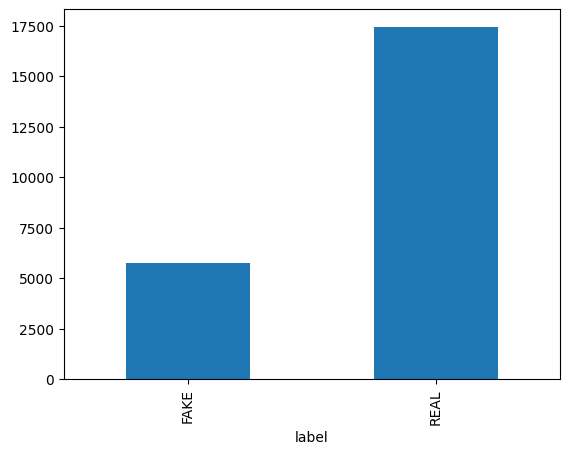

In [6]:
print(df.groupby(['label'])['title'].count())
df.groupby(['label'])['title'].count().plot(kind='bar')
plt.show()

In [7]:
stop_words = stopwords.words('english')
lemmatizer=WordNetLemmatizer()
for index,row in train.iterrows():
    filter_sentence = ''
    
    sentence = row['title']
    sentence = re.sub(r'[^\w\s]','',sentence) #cleaning
    
    words = nltk.word_tokenize(sentence) #tokenization

    print(words)
    
    words = [w for w in words if not w in stop_words]  #stopwords removal
    
    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()
        
    train.loc[index,'title'] = filter_sentence


['Kate', 'Beckinsale', 'Says', 'Harvey', 'Weinstein', 'Offered', 'Her', 'Alcohol', 'When', 'She', 'Was', '17', 'Years', 'Old']
['TV', 'Cast', 'Shakeups', 'Whos', 'Coming', 'and', 'Going', 'From', 'Supergirl', 'The', 'Walking', 'Dead', 'and', 'More']
['Sage', 'Steele', 'slammed', 'for', 'Instagram', 'post', 'about', 'protests', 'at', 'airport']
['Tracing', 'johnny', 'depps', 'steep', 'descent', 'from', 'untouchable', 'stardom']
['Pregnant', 'Khloe', 'Kardashian', 'dazzles', 'in', 'new', 'Christmas', 'family', 'photo', 'but', 'still', 'missing', 'Kylie', 'Jenner', 'Tech2']
['Lifestyle', 'Discovery', 'Channel']
['Gigi', 'Hadid', 'at', 'Fashion', 'Week', 'Fall', '2018']
['All', 'the', 'Surprise', 'Songs', 'Taylor', 'Swift', 'Has', 'Performed', 'On', 'Her', 'Reputation', 'Stadium', 'Tour', 'BStage', 'So', 'Far']
['The', 'Weeknd', 'Instigated', 'Breakup', 'With', 'Selena', 'Gomez']
['BTS', 'KPop', 'Boy', 'Band', 'Learned', 'English', 'by', 'Watching', 'Friends']
['Watch', 'Cardi', 'B', 'Hila

In [8]:
train = train[['title','label']]

In [9]:
print(train)
X_train = train['title']
Y_train = train['label']

                                                   title label
9425    kate beckinsale says harvey weinstein offered...  REAL
15940   tv cast shakeups whos coming going from super...  REAL
11183   sage steele slammed instagram post protest ai...  FAKE
14628   tracing johnny depps steep descent untouchabl...  REAL
18821   pregnant khloe kardashian dazzle new christma...  REAL
...                                                  ...   ...
20479   hot mama pregnant khloé kardashian strips dow...  REAL
17888                      meet wags miamis faven liuget  REAL
7878    simone biles fully shut down hater who called...  REAL
4147    a christmas prince the royal wedding awesomel...  REAL
15898             julianne hough us 3 spice whiten teeth  REAL

[16237 rows x 2 columns]


In [10]:
#Feature extraction using count vectorization and tfidf.
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.transform(freq_term_matrix)


In [11]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in iter.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


In [12]:
test_counts = count_vectorizer.transform(test['title'].values)
test_tfidf = tfidf.transform(test_counts)

#split in samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, Y_train, random_state=0)
print(X_train.shape,X_test.shape)

(12177, 16865) (4060, 16865)


In [13]:
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)
print('Accuracy of Logistic classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

cm = confusion_matrix(y_test, pred)
cm


Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.80


c:\fake_news_detection\my_venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 567,  472],
       [ 324, 2697]], dtype=int64)

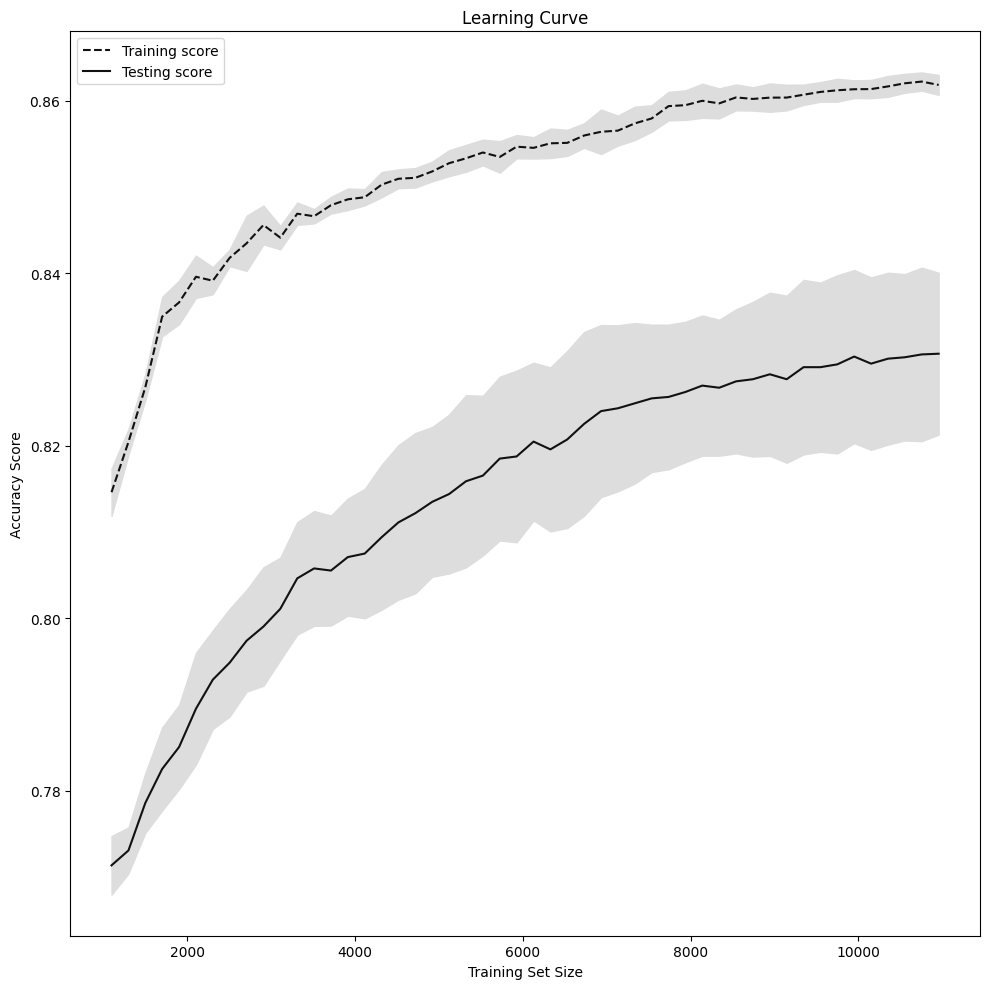

In [14]:
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 50))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Testing score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [15]:
NB = MultinomialNB()
NB.fit(X_train, y_train)
pred = NB.predict(X_test)
print('Accuracy of NB  classifier on training set: {:.2f}'
     .format(NB.score(X_train, y_train)))
print('Accuracy of NB classifier on test set: {:.2f}'
     .format(NB.score(X_test, y_test)))
cm = confusion_matrix(y_test, pred)
cm

Accuracy of NB  classifier on training set: 0.84
Accuracy of NB classifier on test set: 0.79


array([[ 252,  787],
       [  46, 2975]], dtype=int64)

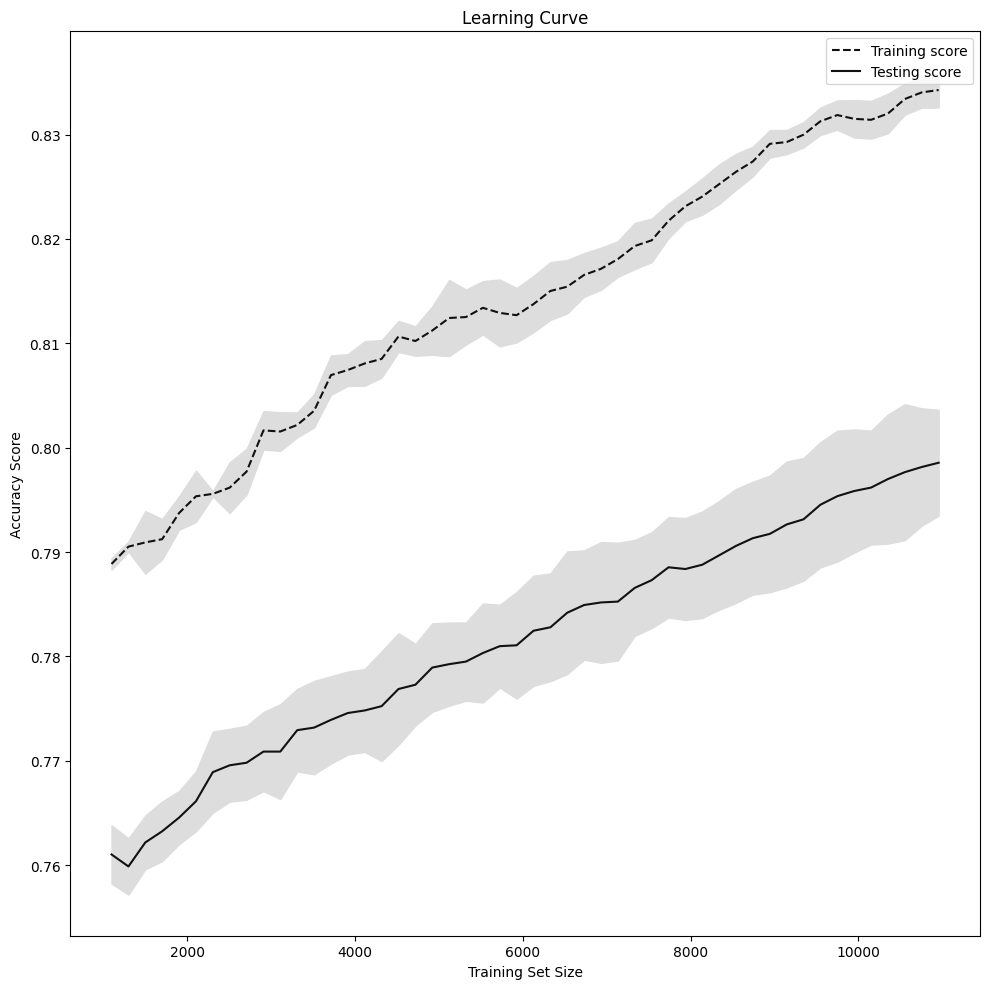

In [16]:
train_sizes, train_scores, test_scores = learning_curve(MultinomialNB(), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 50))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Testing score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [17]:
X_train = train['title']
Y_train = train['label']

In [18]:
from sklearn.pipeline import Pipeline
import joblib

from sklearn import linear_model

In [19]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer(norm='l2')),
    ('clf', linear_model.LogisticRegression(C=1e5)),
])


In [20]:
pipeline.fit(X_train, Y_train)

c:\fake_news_detection\my_venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=100000.0))])

In [26]:
pipeline.predict(["Selena Gomez's Mom unhappy About Bieber Romance"])

array(['REAL'], dtype=object)

In [32]:
pipeline.predict(["Brad Pitt unConfident Work"])

array(['REAL'], dtype=object)

In [22]:
#saving the pipeline
filename = 'pipeline_final.sav'
joblib.dump(pipeline, filename)

['pipeline_final.sav']

In [23]:
loaded_model = joblib.load(filename)


In [24]:
result = loaded_model.predict(["‘Tormented’ Brad Pitt will only be allowed ‘to spend four hours with his children on Christmas Day’"])
print(result)

['REAL']


In [33]:
result = loaded_model.predict(["Brad Pitt unConfident Work"])
print(result)

['REAL']
